## Install deps

In [60]:
# %pip install pandas
# %pip install scikit-learn
# %pip install seaborn

## Imports

In [61]:
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

## Load dataset

In [62]:
dataframe = read_csv("clear_all_data.csv", index_col=0)
dataframe.head()

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

## Define args and y

In [ ]:
X = dataframe.drop("price_per_m2", axis=1)
y = dataframe.price_per_m2


In [ ]:
X.shape

(4233, 1314)

In [ ]:
y.shape

(4233,)

## Split to train and test dataframes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## Define and train models

In [ ]:
model_list = []

### Lasso regression

* ### Create CV for lasso regression model

In [ ]:
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=5)

* ### Learn model

In [ ]:
from sklearn.linear_model import LassoCV
lasso_model = LassoCV(cv=cv, n_jobs=-1, max_iter=10000)
lasso_model.fit(X_train, y_train)
model_list.append(lasso_model)

### Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
model_list.append(linear_model)

### ElasticNET

In [ ]:
from sklearn.linear_model import ElasticNetCV
elastic_model = ElasticNetCV(cv=cv, n_jobs=-1, max_iter=10000)
elastic_model.fit(X_train, y_train)
model_list.append(elastic_model)

### Ridge

In [ ]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1e-10)
ridge_model.fit(X_train,y_train)
model_list.append(ridge_model)

c:\Users\mihsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.61082e-30): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


## GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
ridge_model = GradientBoostingRegressor(random_state=0)
ridge_model.fit(X_train,y_train)
model_list.append(ridge_model)

## Make prediction

In [ ]:
predict_list = []

for model in model_list:
    predict_list.append(model.predict(X_test))

## Plot of data

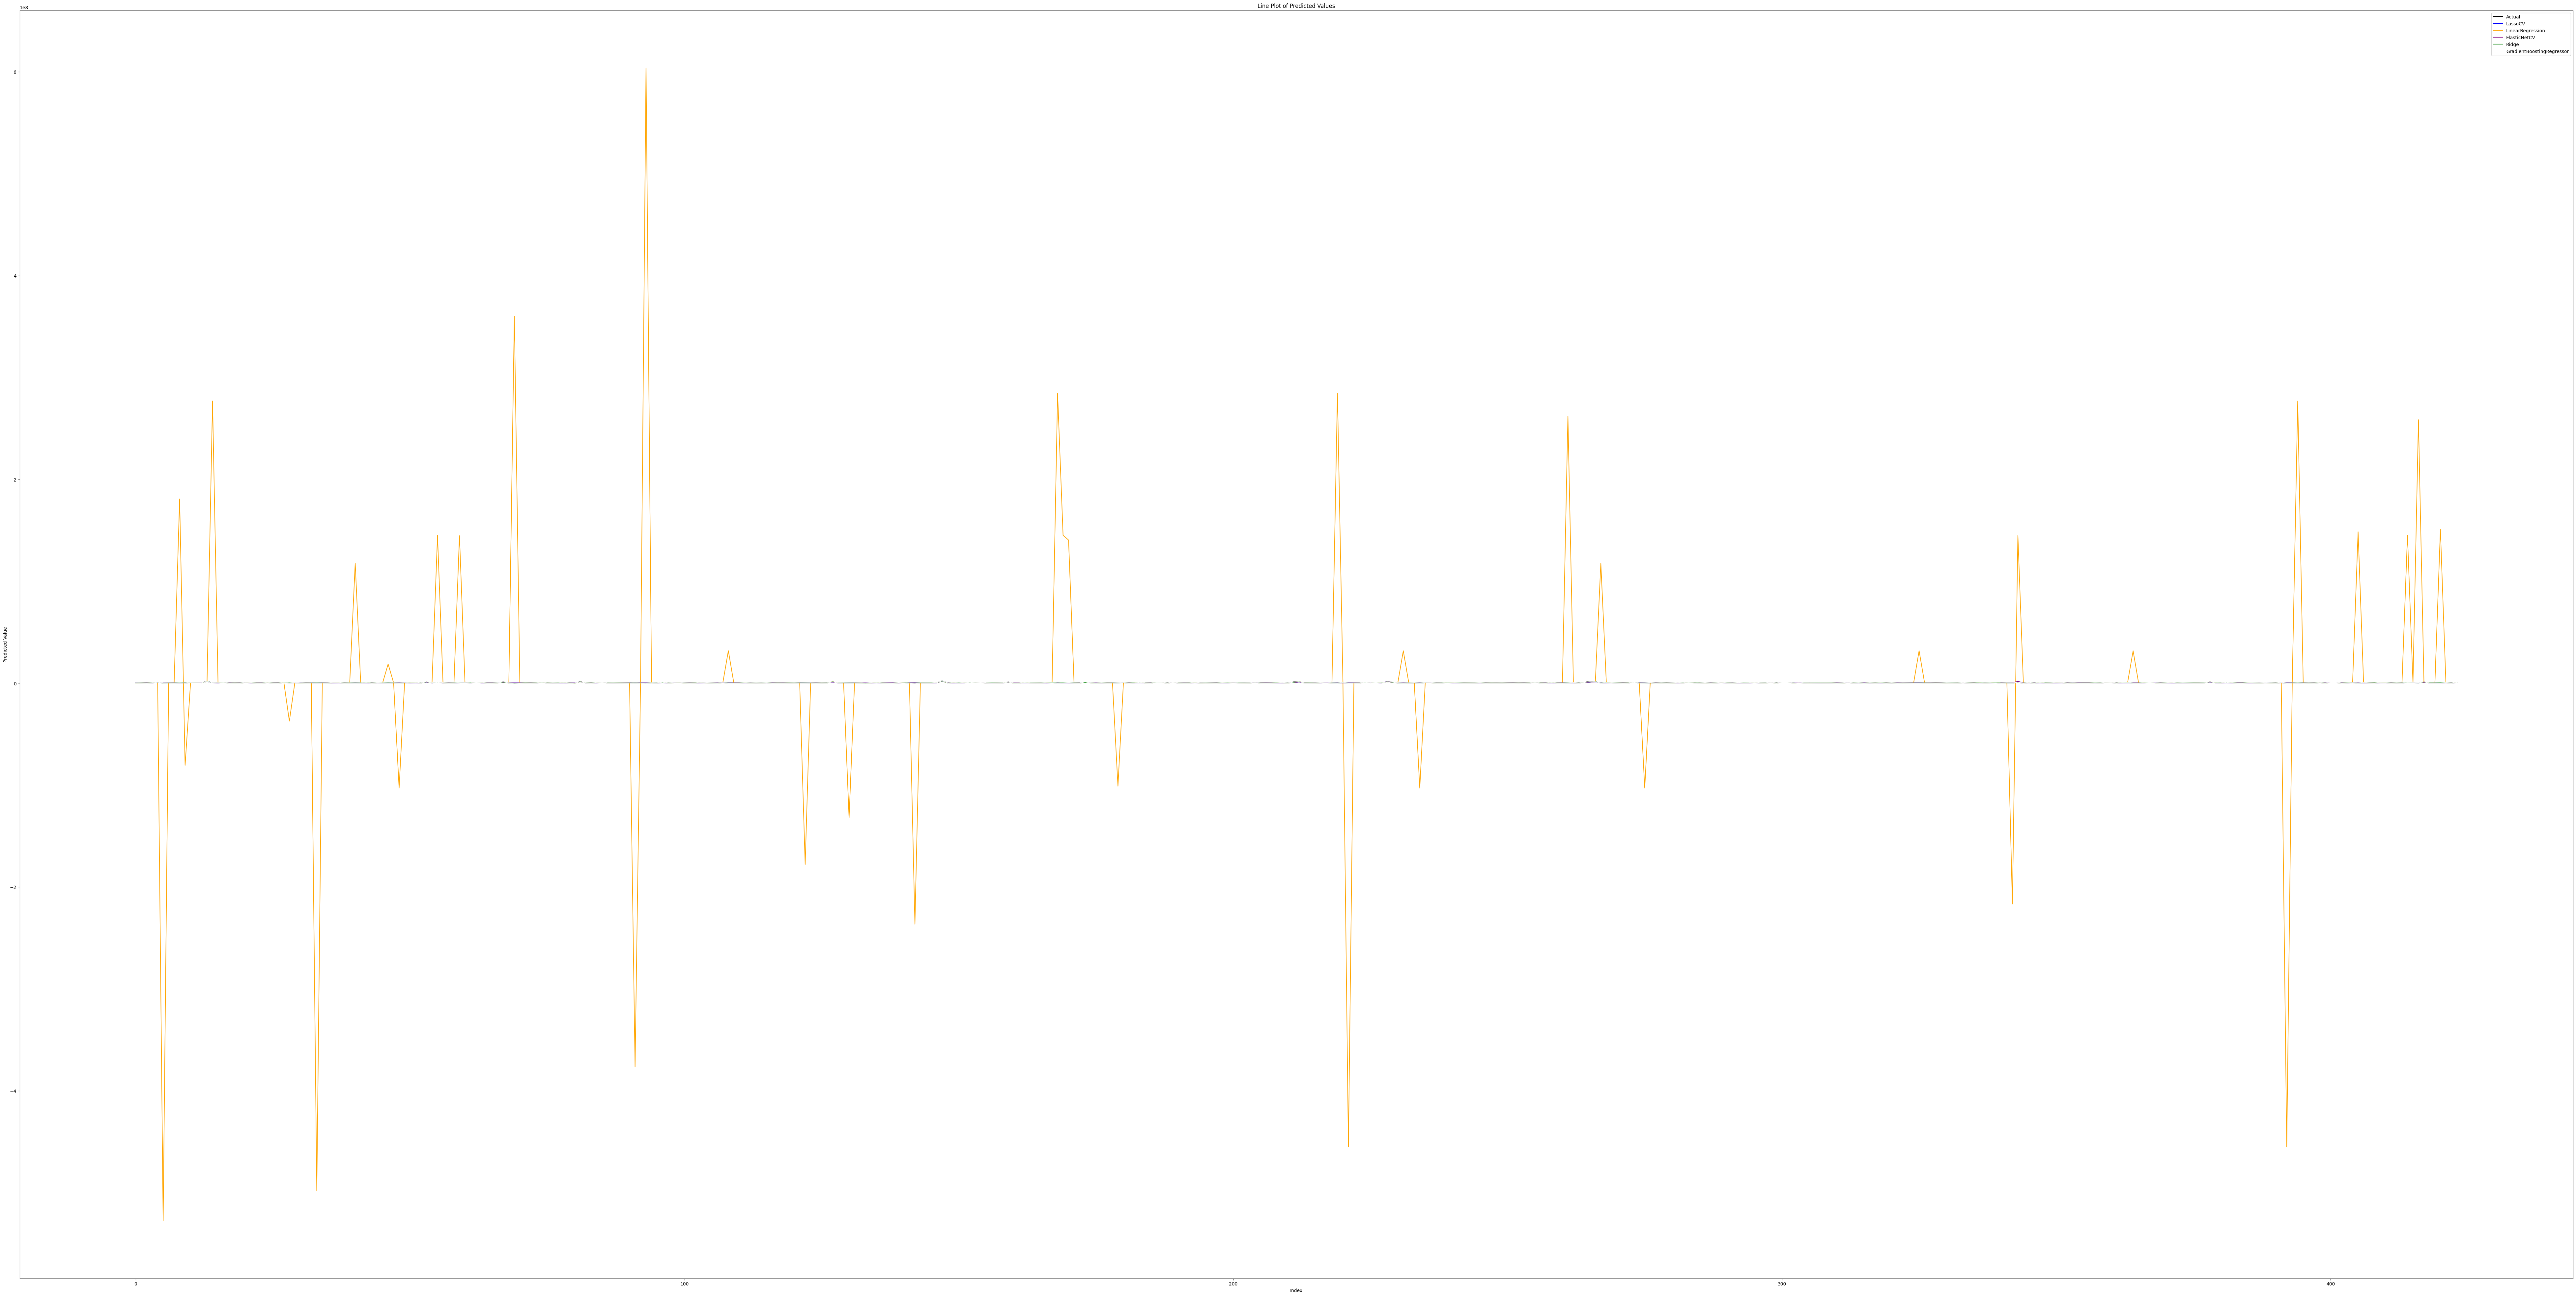

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import colors
import pandas as pd
import seaborn as sns

ALL_COLORS = ["blue","orange","purple","green","white","gray"]

plt.figure(figsize=(100, 50))
sns.lineplot(x=range(len(y_test)), y=y_test, color='black', label='Actual')
plt.xlabel('Index')
plt.ylabel('Predicted Value')
plt.title('Line Plot of Predicted Values')

for i in range(0, len(model_list)):
    sns.lineplot(x=range(len(predict_list[i])), y=predict_list[i], color=ALL_COLORS[i], label=type(model_list[i]).__name__)

plt.show()

## Check score of model

In [ ]:
print("Scores: ")
for i, model in enumerate(model_list):
    print(f"\n* {type(model_list[i]).__name__}: {model.score(X_test, y_test)*100:.2f}%\t")

Scores: 

* LassoCV: 65.18%	

* LinearRegression: -8241658.42%	

* ElasticNetCV: 65.22%	

* Ridge: 88.83%	

* GradientBoostingRegressor: 97.00%	


## Mean errors

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Absolute

In [ ]:
print("MAE (Mean Absolute Error): ")
for i, predict in enumerate(predict_list):
    mse = mean_absolute_error(y_true=y_test, y_pred=predict)
    print(f"\n* {type(model_list[i]).__name__}: {mse:.2f}\t")

MAE (Mean Absolute Error): 

* LassoCV: 105785.06	

* LinearRegression: 18757636.52	

* ElasticNetCV: 105543.00	

* Ridge: 55106.71	

* GradientBoostingRegressor: 26067.25	


### Squared

In [ ]:
print("MSE (Mean Squared Error): ")
for i, predict in enumerate(predict_list):
    print(f"\n* {type(model_list[i]).__name__}: {mean_squared_error(y_test, predict):.2f}\t")


MSE (Mean Squared Error): 

* LassoCV: 24538450428.63	

* LinearRegression: 5807715304887096.00	

* ElasticNetCV: 24509046067.50	

* Ridge: 7871999139.31	

* GradientBoostingRegressor: 2110591188.33	
